# Outlook - Object Detection

In practice it is not only important to classify the different types of blood cells, but also to detect the position of the individual cells in order to count e.g. the number of white cells on an image. Additionally to the images the dataset contains the bounding boxes of the white blood cells, the red blood cells and the platelets for the original images. The objects (cells) are located by bounding boxes. In this case not the different types of white blood cells are considered as classes, but it is distinguished between white blood cells, red blood cells and platelets. That is three classes are considered. 

In this notebook just some visualizations of the bounding boxes are shown. Future work is to run an object detection algorithm like Faster RNN or YOLO.

## Setup

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import cv2
import xml.etree.ElementTree as ET
import os
import glob
import pandas as pd
import io

## Read the Data

The original images have been divided in a training and in a test set. The folders contain the images and the annotations.

In [2]:
# path containing the training data
train_dir = '../../../models/research/object_detection/images/train/'
# path containing the test data
val_dir = '../../../models/research/object_detection/images/test/'

## Visualize the Bounding Boxes

**Note:** The bounding boxes given on the kaggle platform only contain the red blood cells. The annotations from the blood cells including white blood cells, red blood cells and platelets are taken from https://github.com/Shenggan/BCCD_Dataset

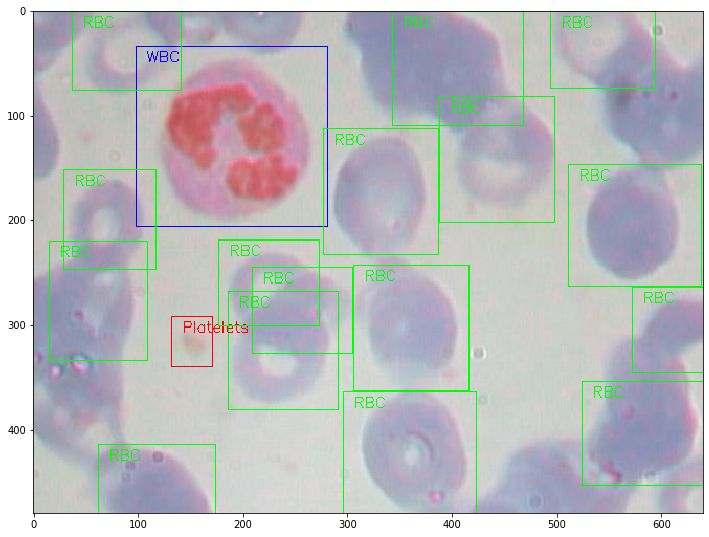

In [3]:
# This function is adapted from https://github.com/Shenggan/BCCD_Dataset
def plot_img_bb(image, tree):
    for elem in tree.iter():
        if 'object' in elem.tag or 'part' in elem.tag:
            for attr in list(elem):
                if 'name' in attr.tag:
                    name = attr.text
                if 'bndbox' in attr.tag:
                    for dim in list(attr):
                        if 'xmin' in dim.tag:
                            xmin = int(round(float(dim.text)))
                        if 'ymin' in dim.tag:
                            ymin = int(round(float(dim.text)))
                        if 'xmax' in dim.tag:
                            xmax = int(round(float(dim.text)))
                        if 'ymax' in dim.tag:
                            ymax = int(round(float(dim.text)))
                    if name[0] == "R":
                        cv2.rectangle(image, (xmin, ymin),
                                    (xmax, ymax), (0, 255, 0), 1)
                        cv2.putText(image, name, (xmin + 10, ymin + 15),
                                cv2.FONT_HERSHEY_SIMPLEX, 1e-3 * image.shape[0], (0, 255, 0), 1)
                    if name[0] == "W":
                        cv2.rectangle(image, (xmin, ymin),
                                    (xmax, ymax), (0, 0, 255), 1)
                        cv2.putText(image, name, (xmin + 10, ymin + 15),
                                cv2.FONT_HERSHEY_SIMPLEX, 1e-3 * image.shape[0], (0, 0, 255), 1)
                    if name[0] == "P":
                        cv2.rectangle(image, (xmin, ymin),
                                    (xmax, ymax), (255, 0, 0), 1)
                        cv2.putText(image, name, (xmin + 10, ymin + 15),
                                cv2.FONT_HERSHEY_SIMPLEX, 1e-3 * image.shape[0], (255, 0, 0), 1)

image = cv2.imread(val_dir + "/BloodImage_00023.jpg")
tree = ET.parse(val_dir + "/BloodImage_00023.xml")
plot_img_bb(image, tree)
plt.figure(figsize=(12,12))
plt.imshow(image)
plt.show()

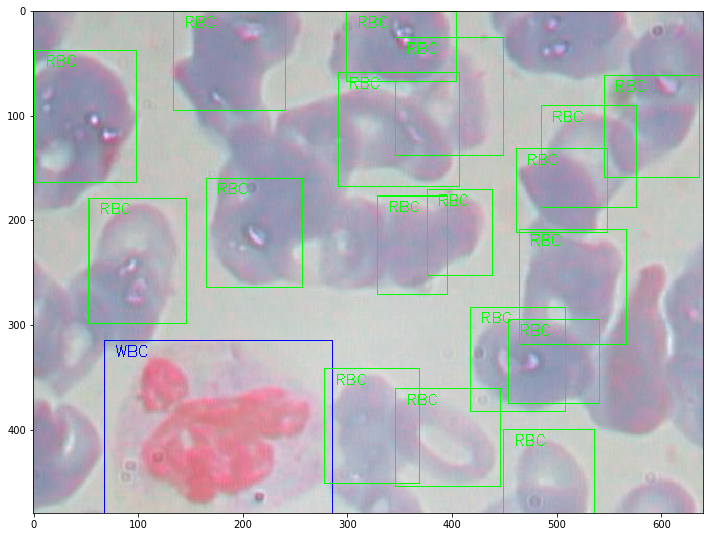

In [4]:
image = cv2.imread(train_dir + "/BloodImage_00001.jpg")
tree = ET.parse(train_dir + "/BloodImage_00001.xml")
plot_img_bb(image, tree)
plt.figure(figsize=(12,12))
plt.imshow(image)
plt.show()